## Input

In [0]:
import pyspark.sql.functions as F
# File location and type
file_train = "/FileStore/tables/train__1_.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df_train = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_train)

In [0]:
df_train.limit(10).toPandas()

Out[2]:

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [0]:
LABEL_COL="price_range"
FEATURES_COL= [col for col in df_train.columns if col != LABEL_COL]

In [0]:
df_train.describe(FEATURES_COL).toPandas()

Out[4]:

,summary,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
1,mean,1238.5185,0.495,1.5222499999999983,0.5095,4.3095,0.5215,32.0465,0.5017500000000017,140.249,4.5205,9.9165,645.108,1251.5155,2124.213,12.3065,5.767,11.011,0.7615,0.503,0.507
2,stddev,439.4182060835313,0.5001000400170073,0.816004208895068,0.5000347661750049,4.341443747983898,0.49966246736236364,18.145714955206856,0.2884155496235117,35.39965489638834,2.2878367180426618,6.064314941347778,443.78081080643824,432.1994469463379,1084.7320436099492,4.213245004356303,4.356397605826408,5.463955197766688,0.426272922318731,0.5001160445626741,0.5000760322381088
3,min,501,0,0.5,0,0,0,2,0.1,80,1,0,0,500,256,5,0,2,0,0,0
4,max,1998,1,3.0,1,19,1,64,1.0,200,8,20,1960,1998,3998,19,18,20,1,1,1


In [0]:
df_train[FEATURES_COL].summary().toPandas()

Out[5]:

,summary,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
1,mean,1238.5185,0.495,1.5222499999999983,0.5095,4.3095,0.5215,32.0465,0.5017500000000017,140.249,4.5205,9.9165,645.108,1251.5155,2124.213,12.3065,5.767,11.011,0.7615,0.503,0.507
2,stddev,439.4182060835313,0.5001000400170073,0.816004208895068,0.5000347661750049,4.341443747983898,0.49966246736236364,18.145714955206856,0.2884155496235117,35.39965489638834,2.2878367180426618,6.064314941347778,443.78081080643824,432.1994469463379,1084.7320436099492,4.213245004356303,4.356397605826408,5.463955197766688,0.426272922318731,0.5001160445626741,0.5000760322381088
3,min,501,0,0.5,0,0,0,2,0.1,80,1,0,0,500,256,5,0,2,0,0,0
4,25%,851,0,0.7,0,1,0,16,0.2,109,3,5,282,874,1206,9,2,6,1,0,0
5,50%,1225,0,1.5,1,3,1,32,0.5,141,4,10,564,1247,2146,12,5,11,1,1,1
6,75%,1615,1,2.2,1,7,1,48,0.8,170,7,15,947,1633,3064,16,9,16,1,1,1
7,max,1998,1,3.0,1,19,1,64,1.0,200,8,20,1960,1998,3998,19,18,20,1,1,1


In [0]:
import pyspark.sql.functions as F

In [0]:
df_train.withColumn('', fuction(col))

In [0]:
df_train.select([F.countDistinct(col).alias(col) for col in df_train.columns]).toPandas()

Out[7]:

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1094,2,26,2,20,2,63,10,121,8,21,1137,1109,1562,15,19,19,2,2,2,4


In [0]:
pd_df.dtypes

In [0]:
df_train.printSchema()

root
-- battery_power: integer (nullable = true)
-- blue: integer (nullable = true)
-- clock_speed: double (nullable = true)
-- dual_sim: integer (nullable = true)
-- fc: integer (nullable = true)
-- four_g: integer (nullable = true)
-- int_memory: integer (nullable = true)
-- m_dep: double (nullable = true)
-- mobile_wt: integer (nullable = true)
-- n_cores: integer (nullable = true)
-- pc: integer (nullable = true)
-- px_height: integer (nullable = true)
-- px_width: integer (nullable = true)
-- ram: integer (nullable = true)
-- sc_h: integer (nullable = true)
-- sc_w: integer (nullable = true)
-- talk_time: integer (nullable = true)
-- three_g: integer (nullable = true)
-- touch_screen: integer (nullable = true)
-- wifi: integer (nullable = true)
-- price_range: integer (nullable = true)

In [0]:
# EDA

In [0]:
from pyspark_dist_explore import Histogram, hist, distplot

In [0]:
withColumn((w)).withColumn((w)).groupby([]).cache().limit(10).toPandas()

In [0]:
# Create some selections on this data
filtered_by_price_0 = df_train.filter(F.col('price_range') == 0)
filtered_by_price_1 = df_train.filter(F.col('price_range') == 1)
filtered_by_price_2 = df_train.filter(F.col('price_range') == 2)
filtered_by_price_3 = df_train.filter(F.col('price_range') == 3)

In [0]:
ram_0 = filtered_by_price_0.select(F.col('ram').alias('ram_0'))
ram_1 = filtered_by_price_1.select(F.col('ram').alias('ram_1'))
ram_2 = filtered_by_price_2.select(F.col('ram').alias('ram_2'))
ram_3 = filtered_by_price_3.select(F.col('ram').alias('ram_3'))

In [0]:
import matplotlib.pyplot as plt

Out[21]:

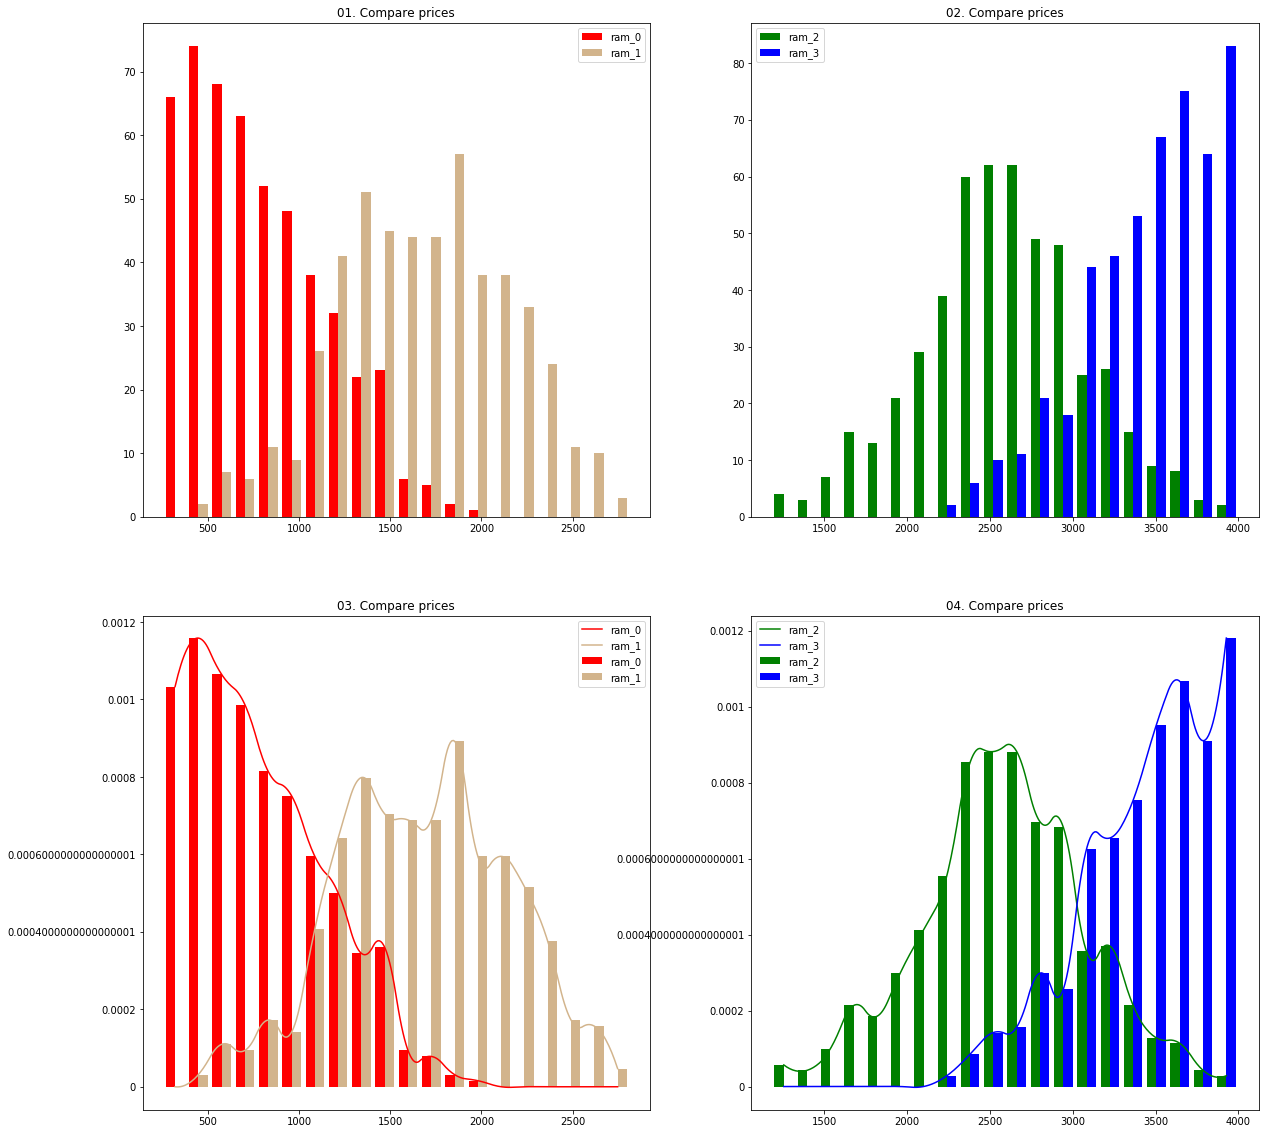

<matplotlib.legend.Legend at 0x7f70d6a36fd0>

In [0]:
#Create the plots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20, 20)

# Use the hist function to plot histograms on the Axes
hist(axes[0, 0], [ram_0, ram_1], bins = 20, color=['red', 'tan'])
axes[0, 0].set_title('01. Compare prices')
axes[0, 0].legend()

# Use the hist function to plot histograms on the Axes
hist(axes[0, 1], [ram_2, ram_3], bins = 20, color=['green', 'blue'])
axes[0, 1].set_title('02. Compare prices')
axes[0, 1].legend()

# Use the distplot function to plot (scaled) histograms + density plots on the Axes
distplot(axes[1, 0], [ram_0, ram_1], bins=20, color=['red', 'tan'])
axes[1, 0].set_title('03. Compare prices')
axes[1, 0].legend()

distplot(axes[1, 1], [ram_2, ram_3], bins=20, color=['green', 'blue'])
axes[1, 1].set_title('04. Compare prices')
axes[1, 1].legend()

In [0]:
df_train, df_val = df_train.randomSplit([0.7, 0.3])

df_train.cache()
df_val.cache()

Out[22]: DataFrame[battery_power: int, blue: int, clock_speed: double, dual_sim: int, fc: int, four_g: int, int_memory: int, m_dep: double, mobile_wt: int, n_cores: int, pc: int, px_height: int, px_width: int, ram: int, sc_h: int, sc_w: int, talk_time: int, three_g: int, touch_screen: int, wifi: int, price_range: int]

In [0]:
Stages = [standart_scaler, .. ,assembler, model]

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

assembler = VectorAssembler(inputCols=FEATURES_COL, outputCol='features')
lr = LinearRegression(featuresCol='features', labelCol=LABEL_COL, maxIter=10)

p = Pipeline(stages=[assembler, lr])

In [0]:
p.stages[-1]

In [0]:
p.fit(df_train).transform(df_train)

Out[24]: DataFrame[battery_power: int, blue: int, clock_speed: double, dual_sim: int, fc: int, four_g: int, int_memory: int, m_dep: double, mobile_wt: int, n_cores: int, pc: int, px_height: int, px_width: int, ram: int, sc_h: int, sc_w: int, talk_time: int, three_g: int, touch_screen: int, wifi: int, price_range: int, features: vector, prediction: double]

In [0]:
model = p.fit(df_train)
lr_model = model.stages[-1]

summary = lr_model.summary
print("RMSE:\t%.2f\nR2:\t%.2f" % (summary.rootMeanSquaredError, summary.r2))

RMSE:	0.32
R2:	0.92

In [0]:
summary.

In [0]:
predictions

Out[28]: DataFrame[battery_power: int, blue: int, clock_speed: double, dual_sim: int, fc: int, four_g: int, int_memory: int, m_dep: double, mobile_wt: int, n_cores: int, pc: int, px_height: int, px_width: int, ram: int, sc_h: int, sc_w: int, talk_time: int, three_g: int, touch_screen: int, wifi: int, price_range: int, features: vector, prediction: double]

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions = model.transform(df_val)

rmse_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=LABEL_COL, metricName="rmse")
r2_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=LABEL_COL, metricName="r2")

print("RMSE:\t%.2f\nR2:\t%.2f" % (rmse_evaluator.evaluate(predictions), r2_evaluator.evaluate(predictions)))

RMSE:	0.33
R2:	0.92

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

param_grid = (ParamGridBuilder()
    .addGrid(lr.regParam, [0.1, 0.01])
    .addGrid(lr.fitIntercept, [False, True])
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
    .build()
)

print("Param grid size: %d" % len(param_grid))

tvs = TrainValidationSplit(estimator=p,
                           estimatorParamMaps=param_grid,
                           evaluator=rmse_evaluator,
                           trainRatio=0.8)

tuned_model = tvs.fit(df_train)
tuned_predictions = tuned_model.transform(df_val)

print("RMSE:\t%.2f\nR2:\t%.2f" % (rmse_evaluator.evaluate(tuned_predictions), r2_evaluator.evaluate(tuned_predictions)))

Param grid size: 12
MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.
RMSE:	0.32
R2:	0.92

In [0]:
df_train.select('price_range').distinct().toPandas()

Out[26]:

,price_range
0,3
1,0
2,1
3,2


In [0]:
df_train.groupBy("price_range").avg("ram").show()

+-----------+------------------+
price_range| avg(ram)|
+-----------+------------------+
 1| 1658.246537396122|
 3|3444.2709497206706|
 2| 2583.0|
 0| 791.2486033519554|
+-----------+------------------+

## Logistic Regression

In [0]:
[('scaled_' + f) for f in FEATURES_COL]

Out[33]: 'scaled_battery_power'

In [0]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.classification import LogisticRegression

va1 = [VectorAssembler(inputCols=[f], outputCol=('vec_' + f)) for f in FEATURES_COL]

ss = [StandardScaler(inputCol='vec_' + f, outputCol='scaled_' + f, withMean=True, withStd=True) for f in FEATURES_COL]

feature_scaled = [('scaled_' + f) for f in FEATURES_COL]

va2 = VectorAssembler(inputCols=feature_scaled, outputCol="features")

lr = LogisticRegression(featuresCol='features', labelCol=LABEL_COL, maxIter=10)

stages = va1 + ss + [va2] + [lr]

p = Pipeline(stages = stages)

In [0]:
model = p.fit(df_train)
lr_model = model.stages[-1]

summary = lr_model.summary

In [0]:
# Print the coefficients and intercept for multinomial logistic regression
print("Coefficients: \n" + str(lr_model.coefficientMatrix))
print("Intercept: " + str(lr_model.interceptVector))


Coefficients: 
DenseMatrix([[-5.86854844e+00, 1.09943570e-01, 1.36741711e-01,
 2.13778379e-01, -1.11459538e-01, -1.53451321e-02,
 -5.35730703e-01, 1.60943888e-01, 8.73285779e-01,
 -1.74072625e-01, -2.72943475e-03, -3.44664542e+00,
 -3.17536240e+00, -2.31285034e+01, -2.50135945e-01,
 1.81953745e-01, -1.38500352e-01, 1.99180681e-02,
 3.37633088e-01, 4.07485966e-01],
 [-1.58914521e+00, -2.43820929e-04, -1.38071792e-02,
 -4.97838904e-03, 8.64929240e-02, 5.59542747e-02,
 -2.07077965e-01, 9.48311053e-02, 3.02042006e-01,
 -1.50427272e-01, -5.00656732e-03, -8.73353698e-01,
 -1.02224660e+00, -6.07821908e+00, -1.41892912e-01,
 -1.15210575e-02, -1.67602019e-01, -9.36048685e-02,
 5.49646549e-02, 7.15594393e-02],
 [ 1.61477641e+00, -6.35489887e-02, -3.32651039e-02,
 -1.92845371e-01, -4.46468743e-02, -1.12626224e-01,
 3.48884383e-02, -1.24573259e-01, -8.49145026e-02,
 5.05603651e-02, 6.50610864e-02, 8.78993961e-01,
 7.70603546e-01, 6.35875165e+00, -9.39437686e-02,
 -1.40787251e-01, 8.20887676e-02, 3.19460655e-02,
 -1.54169368e-01, -1.69831983e-01],
 [ 5.84291725e+00, -4.61507600e-02, -8.96694278e-02,
 -1.59546186e-02, 6.96134879e-02, 7.20170813e-02,
 7.07920230e-01, -1.31201735e-01, -1.09041328e+00,
 2.73939532e-01, -5.73250844e-02, 3.44100515e+00,
 3.42700546e+00, 2.28479708e+01, 4.85972625e-01,
 -2.96454374e-02, 2.24013603e-01, 4.17407349e-02,
 -2.38428374e-01, -3.09213421e-01]])
Intercept: [-7.499655430476155,7.399012587300889,7.266735740707679,-7.166092897532413]

In [0]:
# Obtain the objective per iteration
objectiveHistory = summary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

objectiveHistory:
1.3860683507664193
1.0164632793361492
0.7763912359177693
0.6102191885252138
0.45903093399684836
0.346340306880578
0.254840142345415
0.22510617673313044
0.14933817456194431
0.11895895807136797
0.09441222363963259

In [0]:
# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(summary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

False positive rate by label:
label 0: 0.003770028275212064
label 1: 0.010377358490566037
label 2: 0.00942507068803016
label 3: 0.00463821892393321

In [0]:
print("True positive rate by label:")
for i, rate in enumerate(summary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

True positive rate by label:
label 0: 0.9860724233983287
label 1: 0.9722222222222222
label 2: 0.9693593314763231
label 3: 0.9883040935672515

In [0]:
print("Precision by label:")
for i, prec in enumerate(summary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(summary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(summary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

accuracy = summary.accuracy
falsePositiveRate = summary.weightedFalsePositiveRate
truePositiveRate = summary.weightedTruePositiveRate
fMeasure = summary.weightedFMeasure()
precision = summary.weightedPrecision
recall = summary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

Coefficients: 
DenseMatrix([[-6.08990654e+00, -6.34589571e-03, 2.18601163e-01,
 2.29700158e-01, -1.44189828e-02, 5.72555743e-02,
 -2.42636750e-01, 4.76374369e-02, 9.37763050e-01,
 -2.35275371e-01, -7.51592283e-02, -3.39978134e+00,
 -3.35489511e+00, -2.39571423e+01, -1.64313126e-01,
 -5.87135931e-03, 8.11052421e-02, 1.70129865e-02,
 8.21528500e-02, 3.78888819e-01],
 [-1.60221530e+00, 6.67304551e-02, 6.88427024e-02,
 1.14141354e-01, 9.57443249e-02, 1.76889248e-02,
 -1.76821103e-01, 6.26260538e-02, 3.02753267e-01,
 -2.06862528e-01, -8.83470669e-02, -1.00894154e+00,
 -9.65058114e-01, -6.41562005e+00, -2.29448420e-01,
 2.83982369e-02, -8.79226606e-02, 7.44152229e-02,
 6.17723295e-02, 5.44941241e-02],
 [ 1.69526775e+00, 8.43144291e-02, -1.91264195e-01,
 -8.16662958e-02, -5.20374639e-02, -2.45077346e-01,
 -1.26961063e-02, -5.48115152e-02, -9.85881149e-02,
 4.69726506e-02, 6.85152667e-02, 8.87638793e-01,
 9.03584184e-01, 6.46910395e+00, -2.00749457e-01,
 6.49392196e-02, -2.48865047e-02, 8.60271851e-02,
 -1.33979173e-01, -1.69751855e-01],
 [ 5.99685410e+00, -1.44698989e-01, -9.61796697e-02,
 -2.62175216e-01, -2.92878782e-02, 1.70132847e-01,
 4.32153959e-01, -5.54519755e-02, -1.14192820e+00,
 3.95165249e-01, 9.49910284e-02, 3.52108409e+00,
 3.41636904e+00, 2.39036584e+01, 5.94511003e-01,
 -8.74660972e-02, 3.17039232e-02, -1.77455395e-01,
 -9.94600614e-03, -2.63631088e-01]])
Intercept: [-8.095626563422515,7.489998684585263,7.677452921969214,-7.0718250431319625]
objectiveHistory:
1.3862878144096538
1.0145431700874392
0.7754038614741392
0.6100639151820827
0.45690867657981865
0.34589140058825757
0.2529196673580413
0.22223159633748393
0.14479868737780324
0.1145536876490626
0.08962951123280809
False positive rate by label:
label 0: 0.003714020427112349
label 1: 0.0111731843575419
label 2: 0.012070566388115135
label 3: 0.0018570102135561746
True positive rate by label:
label 0: 0.9860335195530726
label 1: 0.96398891966759
label 2: 0.9748603351955307
label 3: 0.9888268156424581
Precision by label:
label 0: 0.988795518207283
label 1: 0.9666666666666667
label 2: 0.9640883977900553
label 3: 0.9943820224719101
Recall by label:
label 0: 0.9860335195530726
label 1: 0.96398891966759
label 2: 0.9748603351955307
label 3: 0.9888268156424581
F-measure by label:
label 0: 0.9874125874125874
label 1: 0.9653259361997226
label 2: 0.9694444444444444
label 3: 0.9915966386554622
Accuracy: 0.978397212543554
FPR: 0.007211993929879565
TPR: 0.978397212543554
F-measure: 0.9784174752693887
Precision: 0.9784584478318171
Recall: 0.978397212543554

## Decision Tree

In [0]:
FEATURES_COL[15]

Out[54]: 'sc_w'

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

assembler = VectorAssembler(inputCols=FEATURES_COL, outputCol='features')
indexer = StringIndexer().setInputCol(LABEL_COL).setOutputCol("indexedLabel")

dtc = DecisionTreeClassifier().setLabelCol("indexedLabel")

# Chain indexer + dtc together into a single ML Pipeline.
pipeline = Pipeline().setStages([assembler, indexer, dtc])

model = pipeline.fit(df_train)
display(model.stages[-1])

treeNode
"{""index"":29,""featureType"":""continuous"",""prediction"":null,""threshold"":2241.5,""categories"":null,""feature"":13,""overflow"":false}"
"{""index"":13,""featureType"":""continuous"",""prediction"":null,""threshold"":1080.0,""categories"":null,""feature"":13,""overflow"":false}"
"{""index"":5,""featureType"":""continuous"",""prediction"":null,""threshold"":924.5,""categories"":null,""feature"":11,""overflow"":false}"
"{""index"":1,""featureType"":""continuous"",""prediction"":null,""threshold"":1814.5,""categories"":null,""feature"":0,""overflow"":false}"
"{""index"":0,""featureType"":null,""prediction"":1.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":3,""featureType"":""continuous"",""prediction"":null,""threshold"":703.5,""categories"":null,""feature"":13,""overflow"":false}"
"{""index"":2,""featureType"":null,""prediction"":1.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":4,""featureType"":null,""prediction"":0.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":9,""featureType"":""continuous"",""prediction"":null,""threshold"":1224.5,""categories"":null,""feature"":0,""overflow"":false}"
"{""index"":7,""featureType"":""continuous"",""prediction"":null,""threshold"":1609.0,""categories"":null,""feature"":11,""overflow"":false}"


In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Make predictions.
predictions = model.transform(df_val)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % accuracy)

+----------+------------+--------------------+
prediction|indexedLabel| features|
+----------+------------+--------------------+
 0.0| 0.0|[501.0,0.0,2.3,0....|
 1.0| 1.0|[504.0,1.0,0.5,1....|
 1.0| 0.0|[507.0,1.0,1.9,1....|
 2.0| 2.0|[508.0,0.0,1.6,1....|
 0.0| 0.0|[510.0,0.0,1.7,1....|
+----------+------------+--------------------+
only showing top 5 rows

Test Error = 0.832759

In [0]:
https://github.com/Azure/mmlspark